# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [96]:
NAME = "Baladithya Balamurugan"
STUDENT_ID = "1699864"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?


GRUs use 2 (reset and update) gates while LSTM Units (input, forget, output) use 3 gates.


### Question 1.ii) What are the major advantages of each?

GRU:
* Less parameters
* Less memory usage
* Faster execution
* Keep memory from past activations
* Reduces likelihood of vanishing gradient

LSTM:
* More accurate on longer data sequences
* Keep memory from past activations
* Reduces likelihood of vanishing gradient

### Question 1.iii) What are the major disadvantages of each?

GRU:
* Not as accurate on longer data sequences

LSTM:
* Uses momentum and gradient descent algorithms
* Uses more memory and takes longer to train

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative. \\

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [97]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-07-26 04:02:21--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv.37’

time_series_covid_1 100%[===================>] 174.45K   425KB/s    in 0.4s    

2020-07-26 04:02:22 (425 KB/s) - ‘time_series_covid_19_confirmed.csv.37’ saved [178638/178638]



In [98]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [99]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [100]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [101]:
US_dataframe.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [102]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
US_dataframe.shape

(1, 135)

In [103]:
US_dataframe.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,53,73,104,174,222,337,451,519,711,1109,1561,2157,2870,2968,4360,6141,8917,14157,19479,25825,33761,43850,54112,66055,84091,102276,122069,141205,162707,188724,214205,244610,276547,309699,337573,367215,397992,429686,464442,497943,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


#### Question 2.i.a) Plot the cases for the US 
Using seaborn.lineplot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

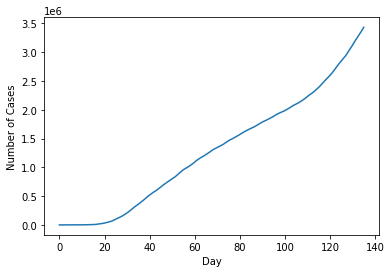

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# YOUR CODE HERE
us_data = US_dataframe.values.flatten() # np.reshape(US_dataframe.T,(135,0))
# print(us_data[-40:])
# print(us_data.shape)
plot = sns.lineplot(x=np.linspace(0,135,num=135),y=us_data)
plot.set(xlabel="Day",ylabel="Number of Cases")
plt.show()

#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

The plot starts exponentially increasing towards the 20-25 day mark and starts flattenning out at around the 70-75 day mark. Then at the 110-120 day mark the rate exponentially increases again. Without knowledge of the future case data at the 70-75 day mark one could say that the curve that visualizes the trend of cases by day starts flattenning out/growing. 

Date approximations:
* Day 20: 02/11/2020
* Day 25: 02/16/2020
* Day 70: 04/01/2020
* Day 75: 04/06/2020
* Day 110: 05/11/2020
* Day 120: 05/21/2020

### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [105]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)

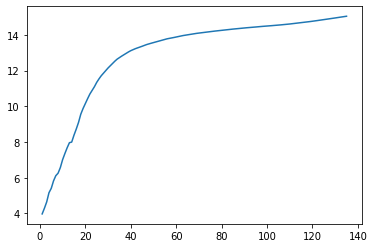

In [106]:
import seaborn as sns
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [107]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
US_data = scaler.fit_transform(np.transpose(US_dataframe))
# print(US_data)

#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [108]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.90):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [109]:
# Call train_test_split on US_data
train, test = train_test_split(US_data,0.65)

train.shape:  (87, 1)
test.shape:  (48, 1)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [110]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# and y contains the reading for today.
def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [111]:
# Choose the number of time steps that the model "looks back"
time_steps = 2 # YOUR CODE HERE

# Create your training dataset.
X_train, y_train = create_dataset(train,time_steps=time_steps)# YOUR CODE HERE
## Create your test dataset.
X_test, y_test = create_dataset(test,time_steps=time_steps)# YOUR CODE HERE

In [112]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer. Run model.summary(), compile, then fit the model. Train for 100 epochs using X_train, y_train, validation_split = 0.2


In [113]:
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Build model architecture here

input_layer = Input(shape=(1,time_steps))
x = LSTM(units=10)(input_layer)
x = Dense(units=1,activation='linear')(x)
model = Model(input_layer,x)

# Compile model
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam())

# Model summary
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Fit model
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Train on 67 samples, validate on 17 samples
Epoch 1/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.1392
Epoch 2/100
67/67 [==============================] - 0s 169us/step - loss: 0.0248 - val_loss: 0.1337
Epoch 3/100
67/67 [==============================] - 0s 195us/step - loss: 0.0233 - val_loss: 0.1279
Epoch 4/100
67/67 [==============================] - 0s 175us/step - loss: 0.0219 - val_loss: 0.1223
Epoch 5/100
67/67 [==============================] - 0s 174us/step - loss: 0.0206 - val_loss: 0.1170
Epoch 6/100
67/67 [==============================] - 0s 179us/step - loss: 0.0194 - val_loss: 0.1120
Epoch 7/100
67/67 [==============================] - 0s 172us/step - loss: 0.0182 - val_loss: 0.1068
Epoch 8/100
67/67 [==============================] - 0s 181us/step - loss: 0.0172 - val_loss: 0.1019
Epoch 9/100
67/67 [==============================] - 0s 174us/step - loss: 0.0161 - val_loss: 0.0971
Epoch 10/100
67/67 [=============================

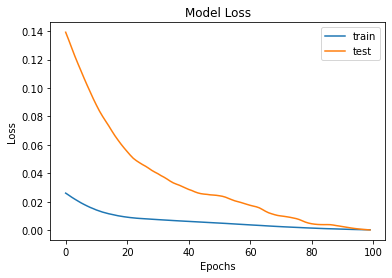

In [115]:
  # Plot the Model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Lets look at our predictions

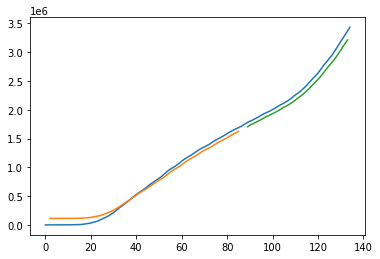

In [116]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_train])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(US_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(US_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(US_data)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(US_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

The fit of the predition is not as bad as I thought it would be. Its a bit under a lot of the curve but follows the trend for the most part. the beginning had a bit of a larger disparity compared to the rest of the prediction and data.

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

The prediction was much farther than the prediction of 0.7 split. I believe that the reason for this is because of the fact that over fitting exists as a possibility of error. LSTM only accounts for the vanishing gradient problem not the exploding gradient problem.

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

With a timestep of 2 a train_validation split of 0.65 is almost perfect fit when it came to the validation testing. However when I reduced the timesteps count to 1 and the 0.65 split it yeeted the model's small loss and ended up with a model whose disparity from the actual data followed the right trend with the wrong slope...

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [22]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
%matplotlib inline

In [24]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [25]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


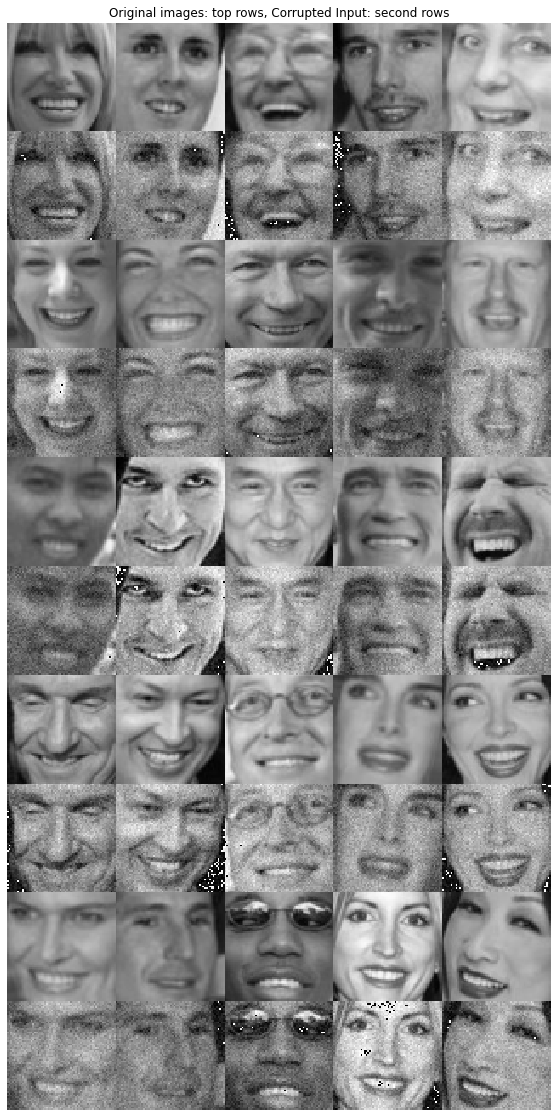

In [26]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autocoders.

In [27]:
# Build the encoder architecture here
latent_dim=16
stride=2

encoder_input_layer = Input(shape=(64,64,1),name='encoder_input')
x = Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',strides=stride)(encoder_input_layer)
x = Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',strides=stride)(x)
x = Flatten()(x)
x = Dense(units=latent_dim,name='latent_dim')(x)
encoder = Model(encoder_input_layer,x,name='encoder')

In [28]:
# Print model summary

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
latent_dim (Dense)           (None, 16)                262160    
Total params: 280,976
Trainable params: 280,976
Non-trainable params: 0
_________________________________________________________________


#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [29]:
# Build the decoder architecture here

input_layer = Input(shape=(latent_dim,),name='decoder_input')
x = Dense(units=(16*16*64),name='latent_rev')(input_layer)
x = Reshape((16,16,64))(x)
x = Conv2DTranspose(filters=64,kernel_size=3,activation='relu',padding='same',strides=stride)(x)
x = Conv2DTranspose(filters=32,kernel_size=3,activation='relu',padding='same',strides=stride)(x)
x = Conv2DTranspose(filters=1,kernel_size=3,padding='same')(x)
x = Activation('sigmoid',name='decoder_output')(x)

decoder = Model(input_layer,x,name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 16)                0         
_________________________________________________________________
latent_rev (Dense)           (None, 16384)             278528    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 64, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 64, 64, 1)         0   

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [30]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
# Print Model Summary

AE = Model(encoder_input_layer,decoder(encoder(encoder_input_layer)),name='AE')
AE.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                280976    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 1)         334209    
Total params: 615,185
Trainable params: 615,185
Non-trainable params: 0
_________________________________________________________________


Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [31]:
# Compile

AE.compile(loss='mse',optimizer='adam')

AE.fit(x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy))

Train on 2952 samples, validate on 738 samples
Epoch 1/1
2952/2952 [==============================] - 26s 9ms/step - loss: 0.0218 - val_loss: 0.0165


### Question 3.iii) Print denoised images (predictions)

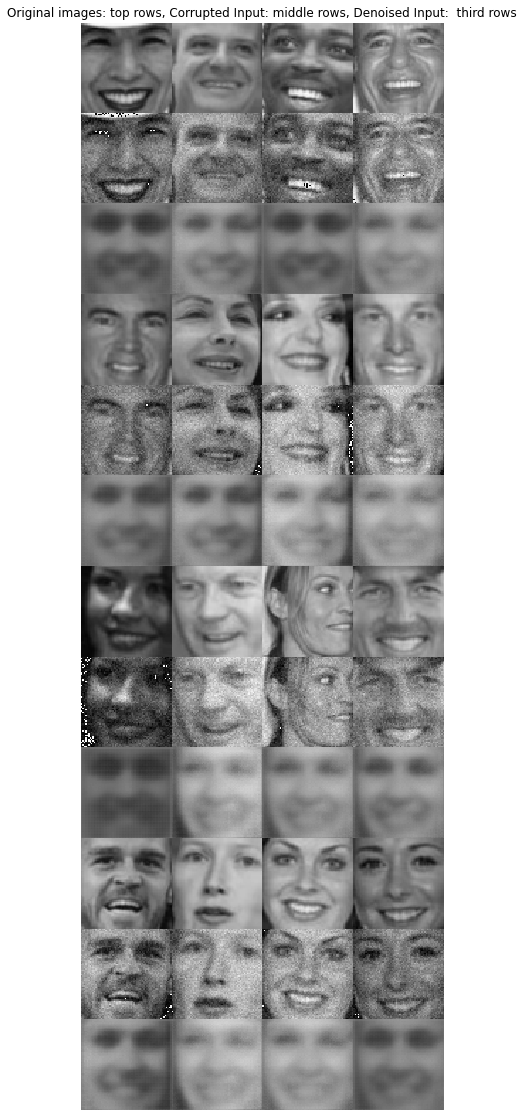

In [32]:
# Predict the Autoencoder output from corrupted test images
x_decoded = AE.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

The model performed pretty well seeing how that the gerneral facial features appear after denoising a noised image. The actual features that differentiate between different images doesn't really follow through since mostly every denoised image looks very similar. The unexpected result was the fact that the general facial feature passing through. I honestly thought that the result would be just blobs of gray no actual differentiation. MSE may have played a big part in the denoised pictures looking very very similar to eachother and changing it to a less smoothing error algorithm may help reduce the fact that the denoised picture lookes like a generalized image.